In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import tensorflow as tf
import glob
import wandb
from wandb.keras import WandbCallback
import shutil
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import albumentations as A
from utils import create_model, augment_images, create_model_v2

config = dict(
    epochs=50,
    learning_rate=1e-4,
    batch_size=64,
    img_shape=(224, 224),
    input_shape=(224, 224, 3),
    num_classes=2,
    dropout_rate=0.2,
    es_patience=10,
    seed_value=42,
)

import pandas as pd

wandb: ERROR Unable to patch Tensorflow/Keras
exception while trying to patch_tf_keras
Traceback (most recent call last):
  File "/home/lorenzoquerol/miniconda3/envs/wssv-recognition/lib/python3.9/site-packages/wandb/integration/keras/keras.py", line 86, in patch_tf_keras
    from keras.engine import training
  File "/home/lorenzoquerol/miniconda3/envs/wssv-recognition/lib/python3.9/site-packages/keras/engine/training.py", line 29, in <module>
    from keras.dtensor import layout_map as layout_map_lib
  File "/home/lorenzoquerol/miniconda3/envs/wssv-recognition/lib/python3.9/site-packages/keras/dtensor/layout_map.py", line 24, in <module>
    from keras.dtensor import dtensor_api as dtensor
ImportError: cannot import name 'dtensor_api' from 'keras.dtensor' (/home/lorenzoquerol/miniconda3/envs/wssv-recognition/lib/python3.9/site-packages/keras/dtensor/__init__.py)
wandb: ERROR Unable to patch Tensorflow/Keras
exception while trying to patch_tf_keras
Traceback (most recent call last):
  

In [2]:
data_dir = "dataset/2-cropped-v3"

train_set, test_set = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    seed=config["seed_value"],
    image_size=config["img_shape"],
    batch_size=config["batch_size"],
    label_mode="categorical",
    subset="both",
)

train_images, train_labels = [], []
for images, labels in train_set:
    train_images.append(images)
    train_labels.append(labels)

train_images = np.concatenate(train_images).astype("uint8")
train_labels = np.concatenate(train_labels)

train_pairs = zip(train_images, train_labels)

test_images, test_labels = [], []
for images, labels in test_set:
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images).astype("uint8")
test_labels = np.concatenate(test_labels)

Found 447 files belonging to 2 classes.
Using 358 files for training.
Using 89 files for validation.


In [3]:
model_name = "mobilenetv3small"

base_model = tf.keras.applications.MobileNetV3Small(
    weights="imagenet",
    input_shape=config["input_shape"],
    include_top=False,
    pooling="avg",
)

# Define the K-fold Cross Validator with 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=config["seed_value"])

Fold 1, Training mobilenetv3small with dropout rate 0.0...
Epoch 1/50
27/27 [==============================] - 9s 65ms/step - loss: 0.7395 - precision: 0.5664 - recall: 0.5664 - f1_score: 0.6659 - false_negatives: 744.0000 - true_positives: 972.0000 - false_positives: 744.0000 - true_negatives: 972.0000 - val_loss: 0.5890 - val_precision: 0.6250 - val_recall: 0.6250 - val_f1_score: 0.7172 - val_false_negatives: 27.0000 - val_true_positives: 45.0000 - val_false_positives: 27.0000 - val_true_negatives: 45.0000
Epoch 2/50
27/27 [==============================] - 1s 32ms/step - loss: 0.6861 - precision: 0.6573 - recall: 0.6573 - f1_score: 0.7372 - false_negatives: 588.0000 - true_positives: 1128.0000 - false_positives: 588.0000 - true_negatives: 1128.0000 - val_loss: 0.5548 - val_precision: 0.6806 - val_recall: 0.6806 - val_f1_score: 0.7588 - val_false_negatives: 23.0000 - val_true_positives: 49.0000 - val_false_positives: 23.0000 - val_true_negatives: 49.0000
Epoch 3/50
27/27 [===========

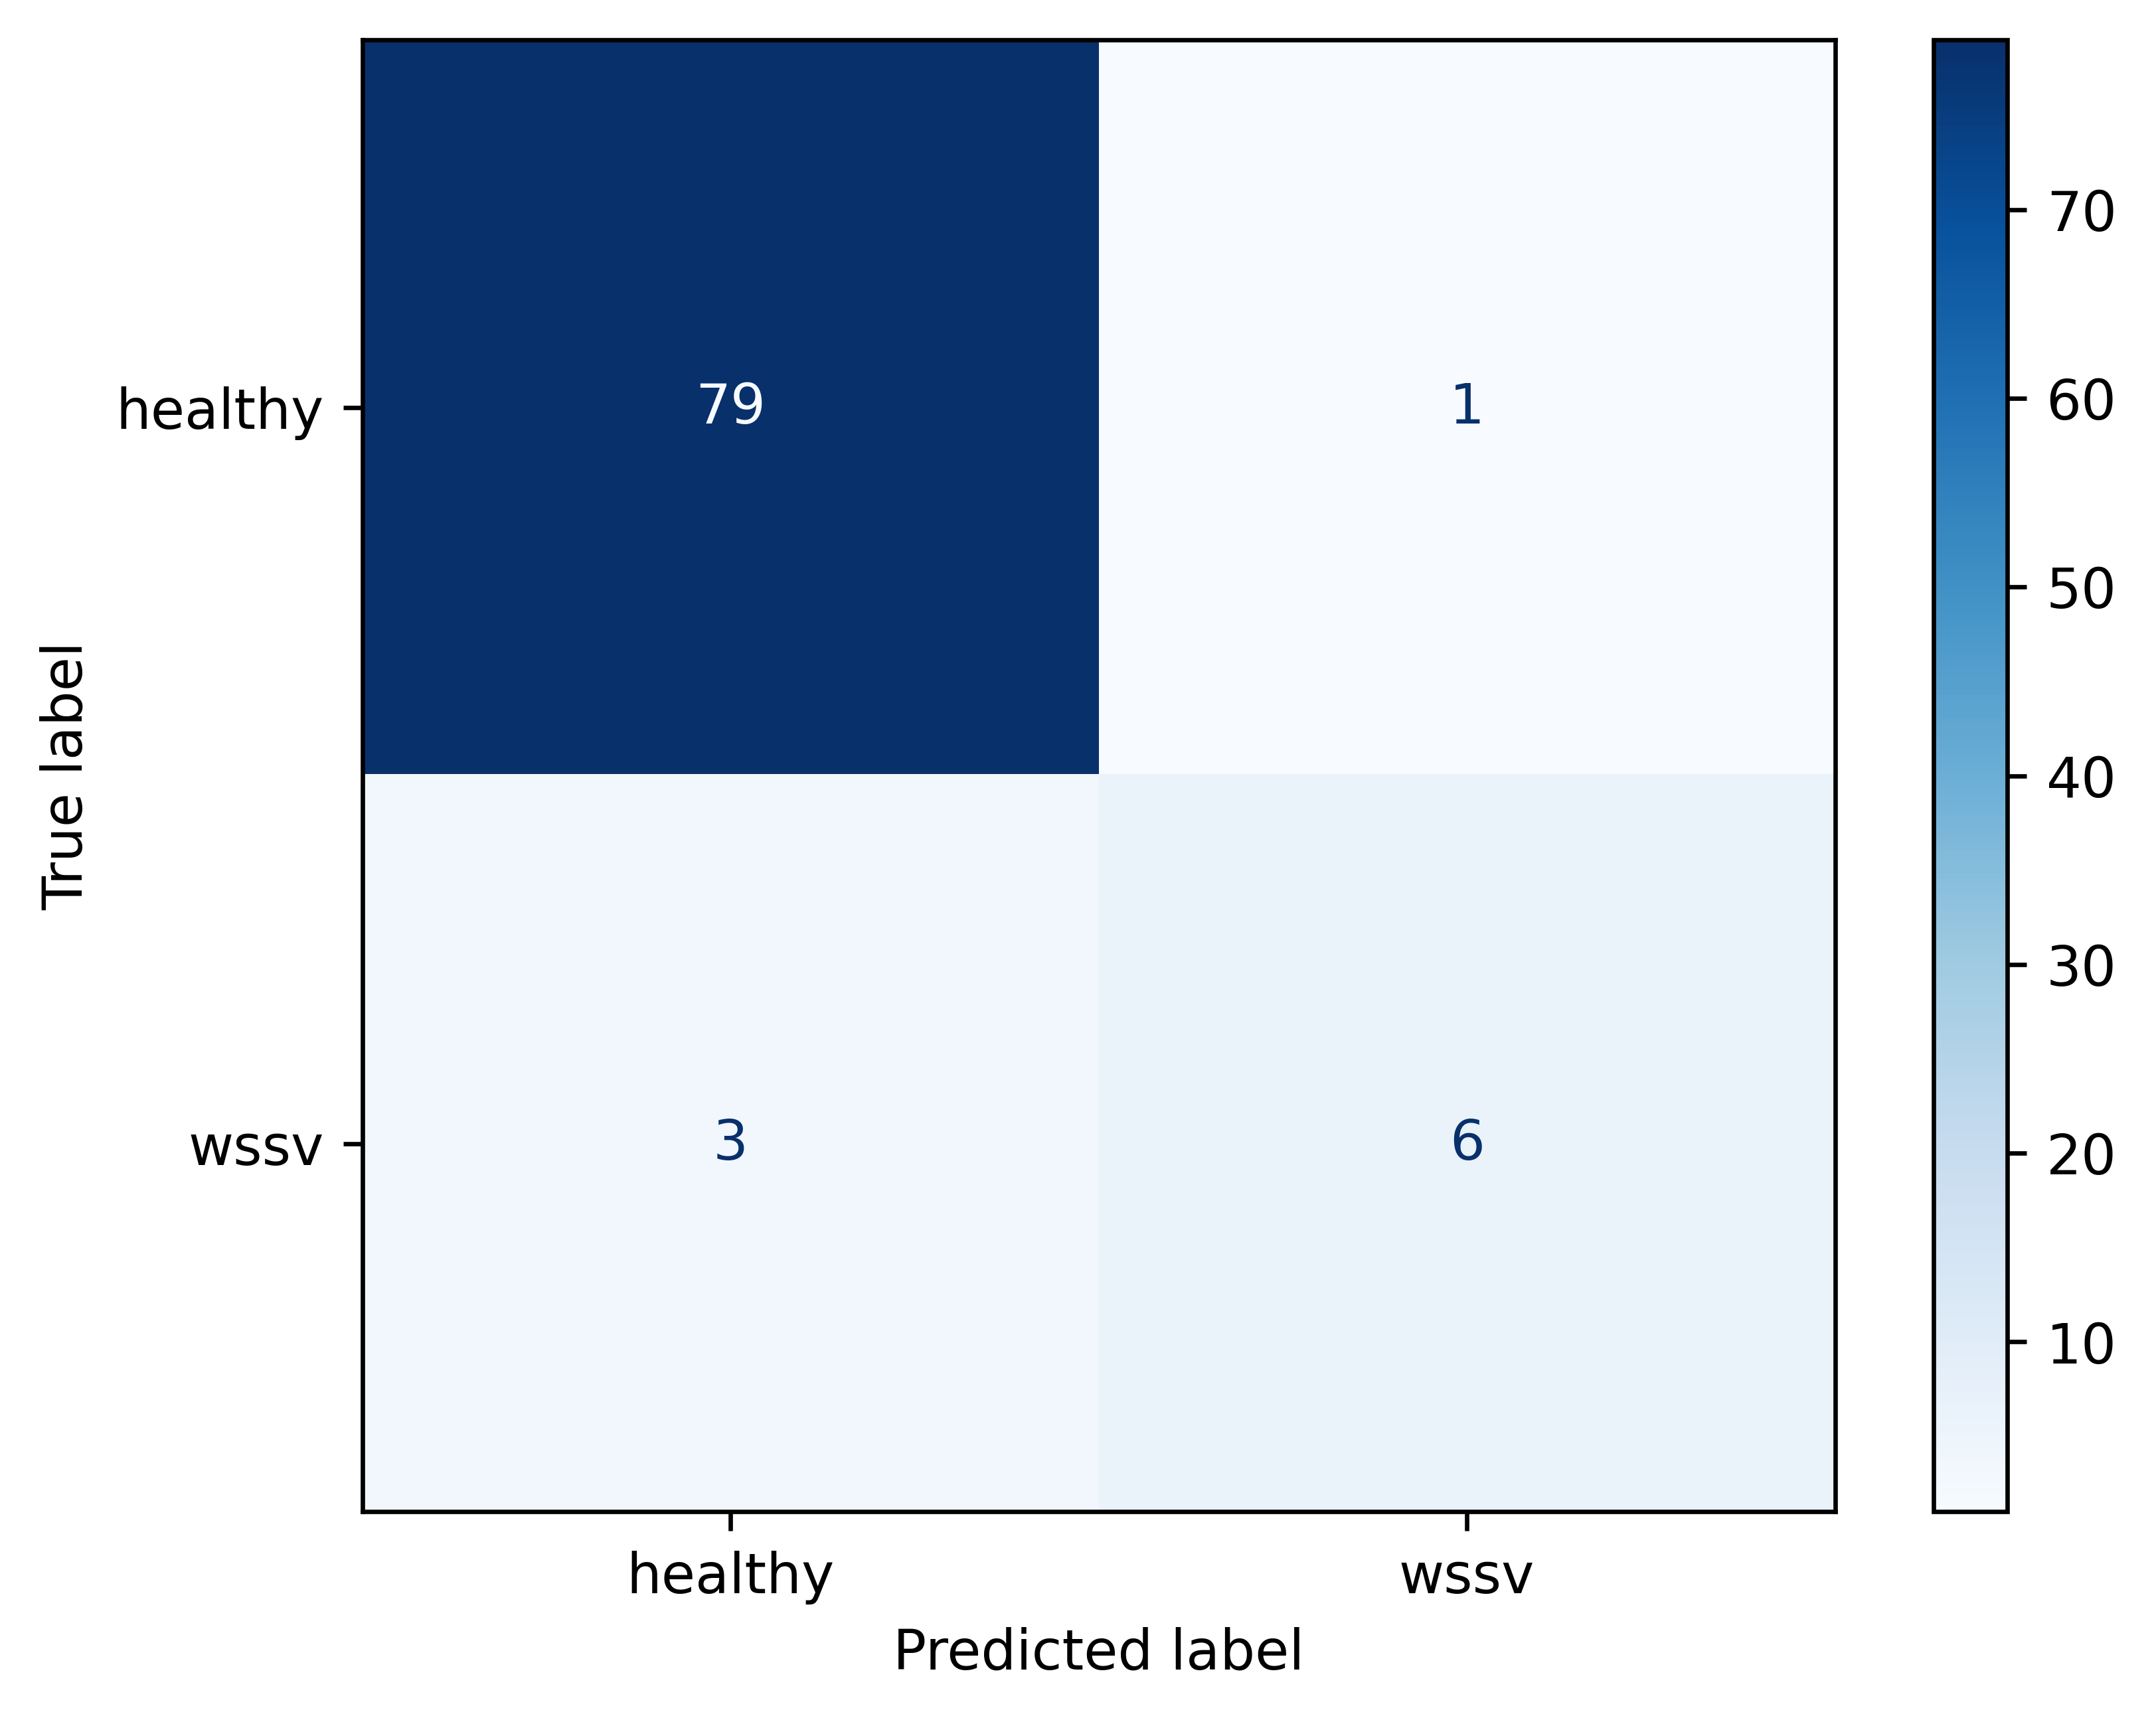

Fold 1, Training mobilenetv3small with dropout rate 0.1...
Epoch 1/50
27/27 [==============================] - 4s 57ms/step - loss: 0.8038 - precision: 0.4481 - recall: 0.4481 - f1_score: 0.5572 - false_negatives: 947.0000 - true_positives: 769.0000 - false_positives: 947.0000 - true_negatives: 769.0000 - val_loss: 0.7464 - val_precision: 0.4861 - val_recall: 0.4861 - val_f1_score: 0.6031 - val_false_negatives: 37.0000 - val_true_positives: 35.0000 - val_false_positives: 37.0000 - val_true_negatives: 35.0000
Epoch 2/50
27/27 [==============================] - 1s 30ms/step - loss: 0.7335 - precision: 0.5862 - recall: 0.5862 - f1_score: 0.6815 - false_negatives: 710.0000 - true_positives: 1006.0000 - false_positives: 710.0000 - true_negatives: 1006.0000 - val_loss: 0.6465 - val_precision: 0.6250 - val_recall: 0.6250 - val_f1_score: 0.7172 - val_false_negatives: 27.0000 - val_true_positives: 45.0000 - val_false_positives: 27.0000 - val_true_negatives: 45.0000
Epoch 3/50
27/27 [===========

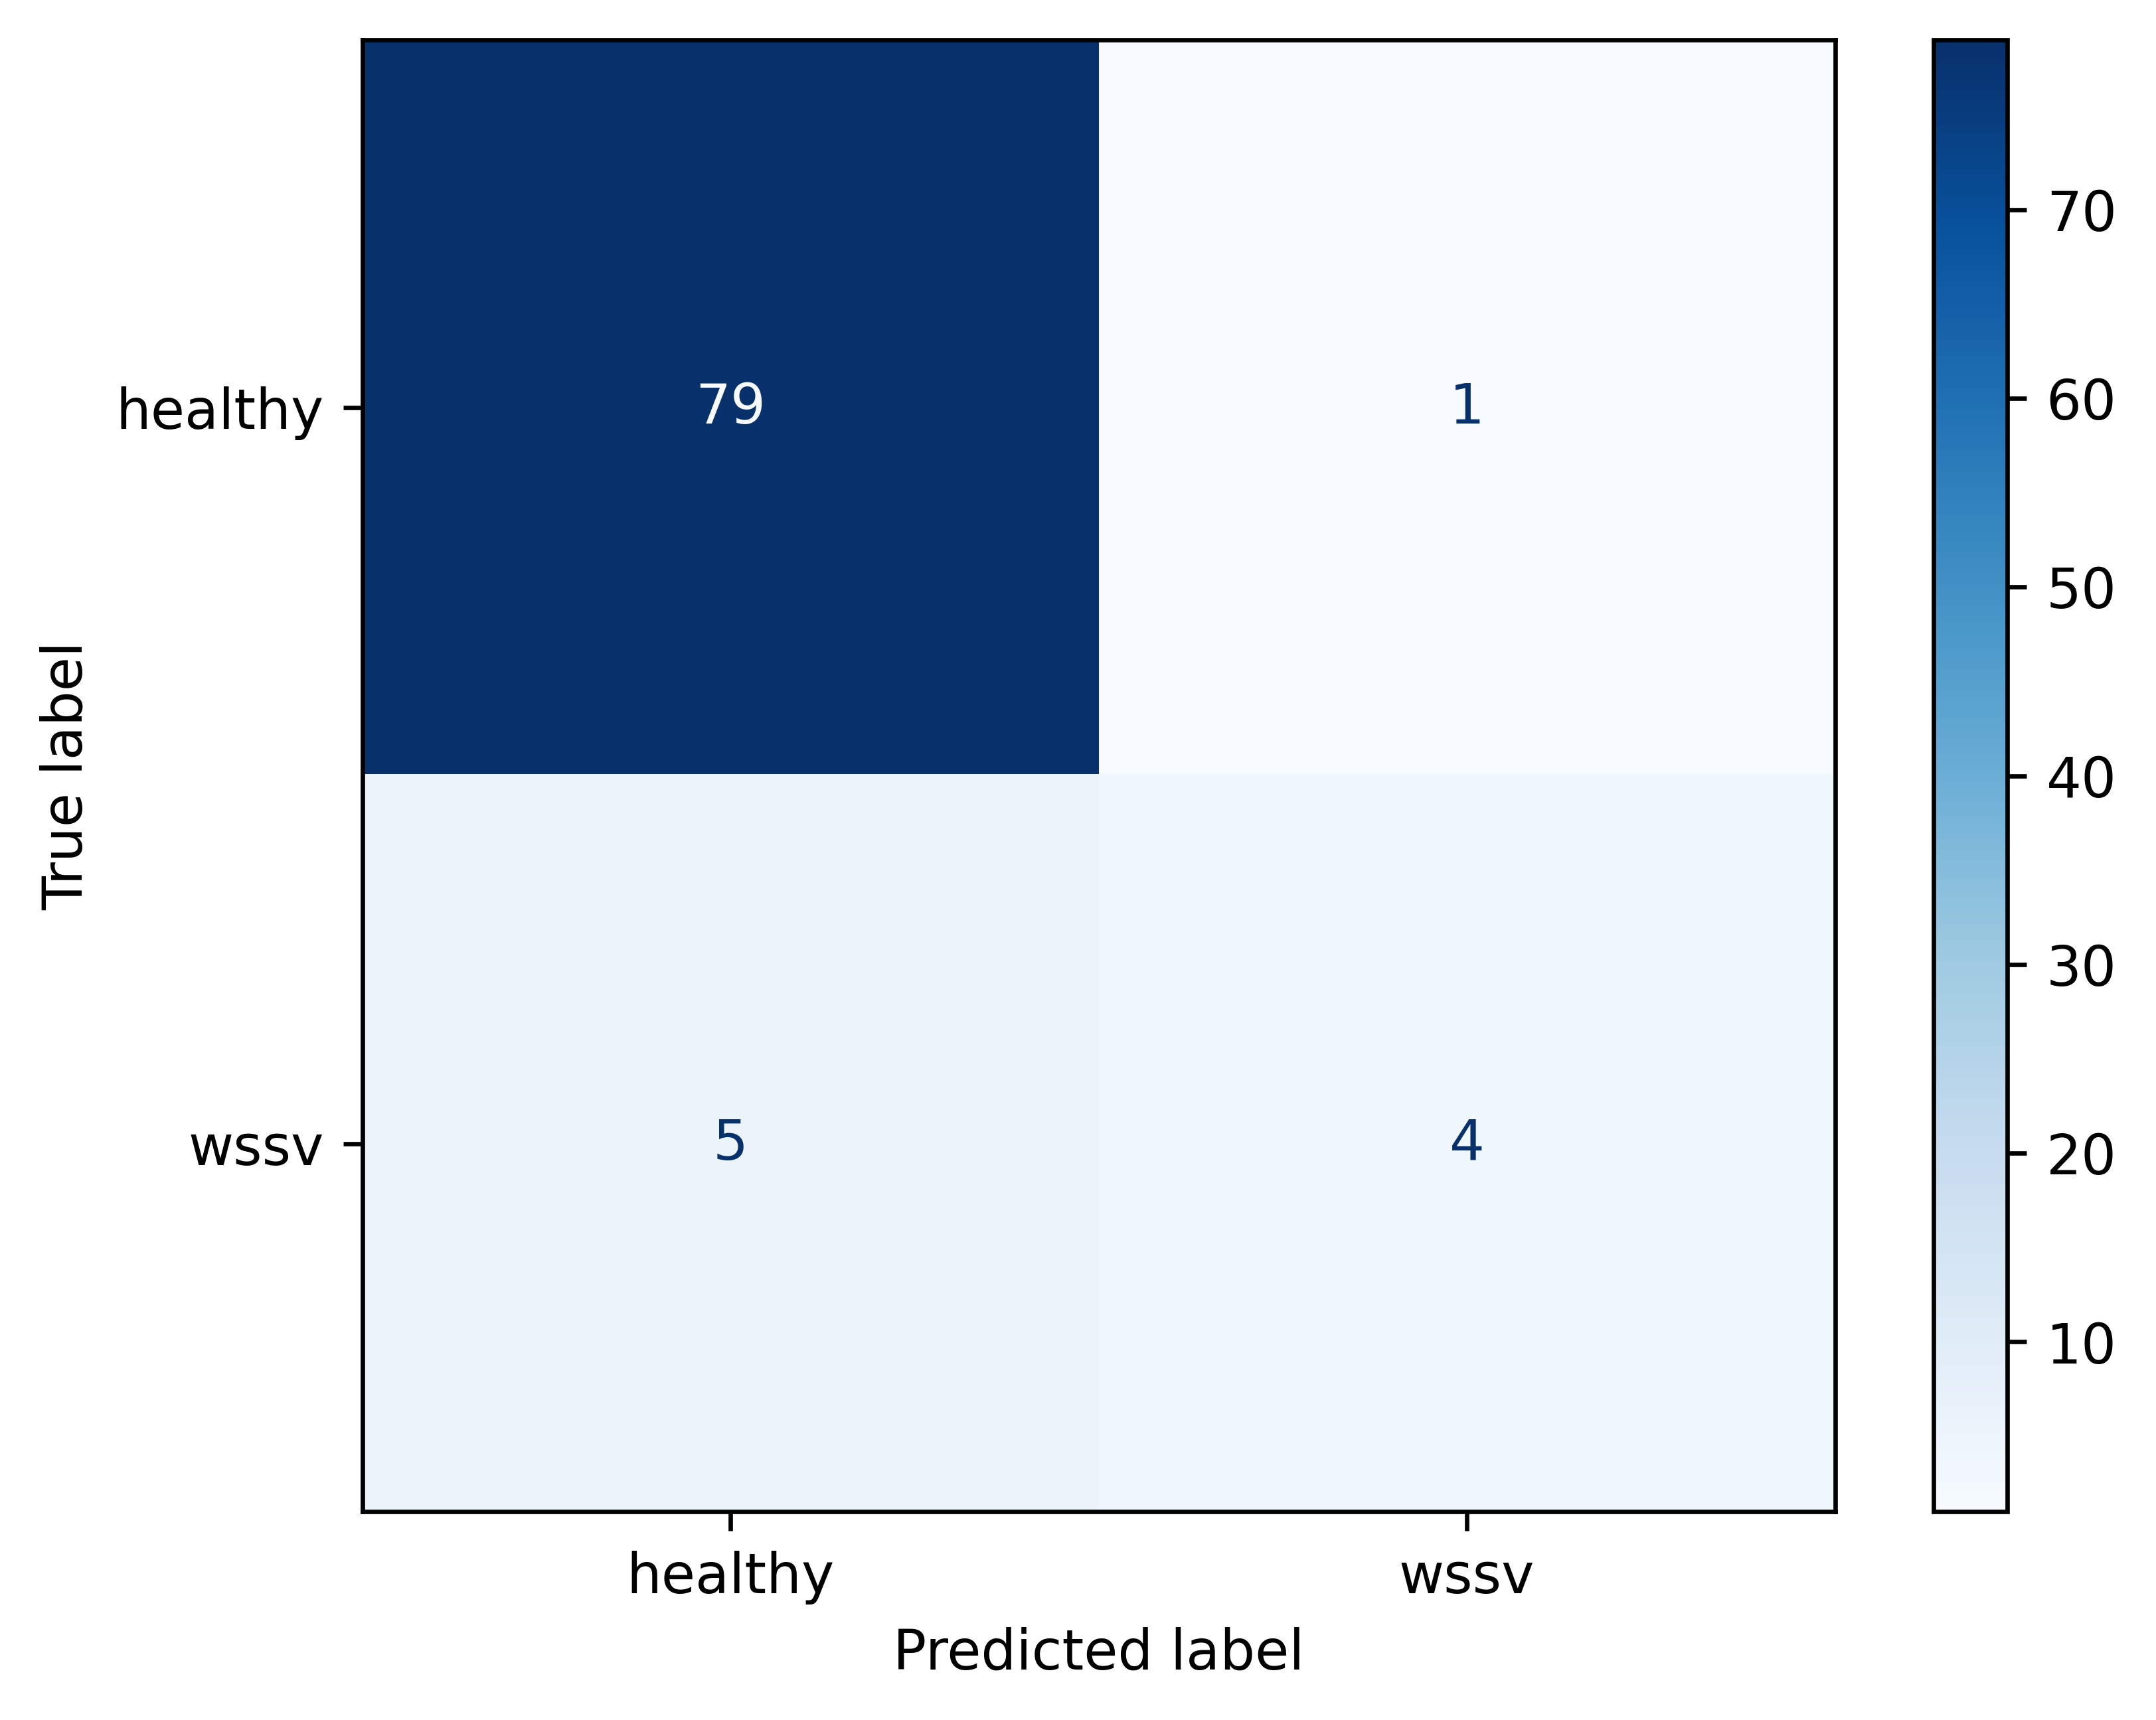

Fold 1, Training mobilenetv3small with dropout rate 0.2...
Epoch 1/50
27/27 [==============================] - 4s 57ms/step - loss: 0.7653 - precision: 0.5682 - recall: 0.5682 - f1_score: 0.6672 - false_negatives: 741.0000 - true_positives: 975.0000 - false_positives: 741.0000 - true_negatives: 975.0000 - val_loss: 0.5783 - val_precision: 0.6667 - val_recall: 0.6667 - val_f1_score: 0.7485 - val_false_negatives: 24.0000 - val_true_positives: 48.0000 - val_false_positives: 24.0000 - val_true_negatives: 48.0000
Epoch 2/50
27/27 [==============================] - 1s 31ms/step - loss: 0.7469 - precision: 0.6107 - recall: 0.6107 - f1_score: 0.7016 - false_negatives: 668.0000 - true_positives: 1048.0000 - false_positives: 668.0000 - true_negatives: 1048.0000 - val_loss: 0.5377 - val_precision: 0.6944 - val_recall: 0.6944 - val_f1_score: 0.7690 - val_false_negatives: 22.0000 - val_true_positives: 50.0000 - val_false_positives: 22.0000 - val_true_negatives: 50.0000
Epoch 3/50
27/27 [===========

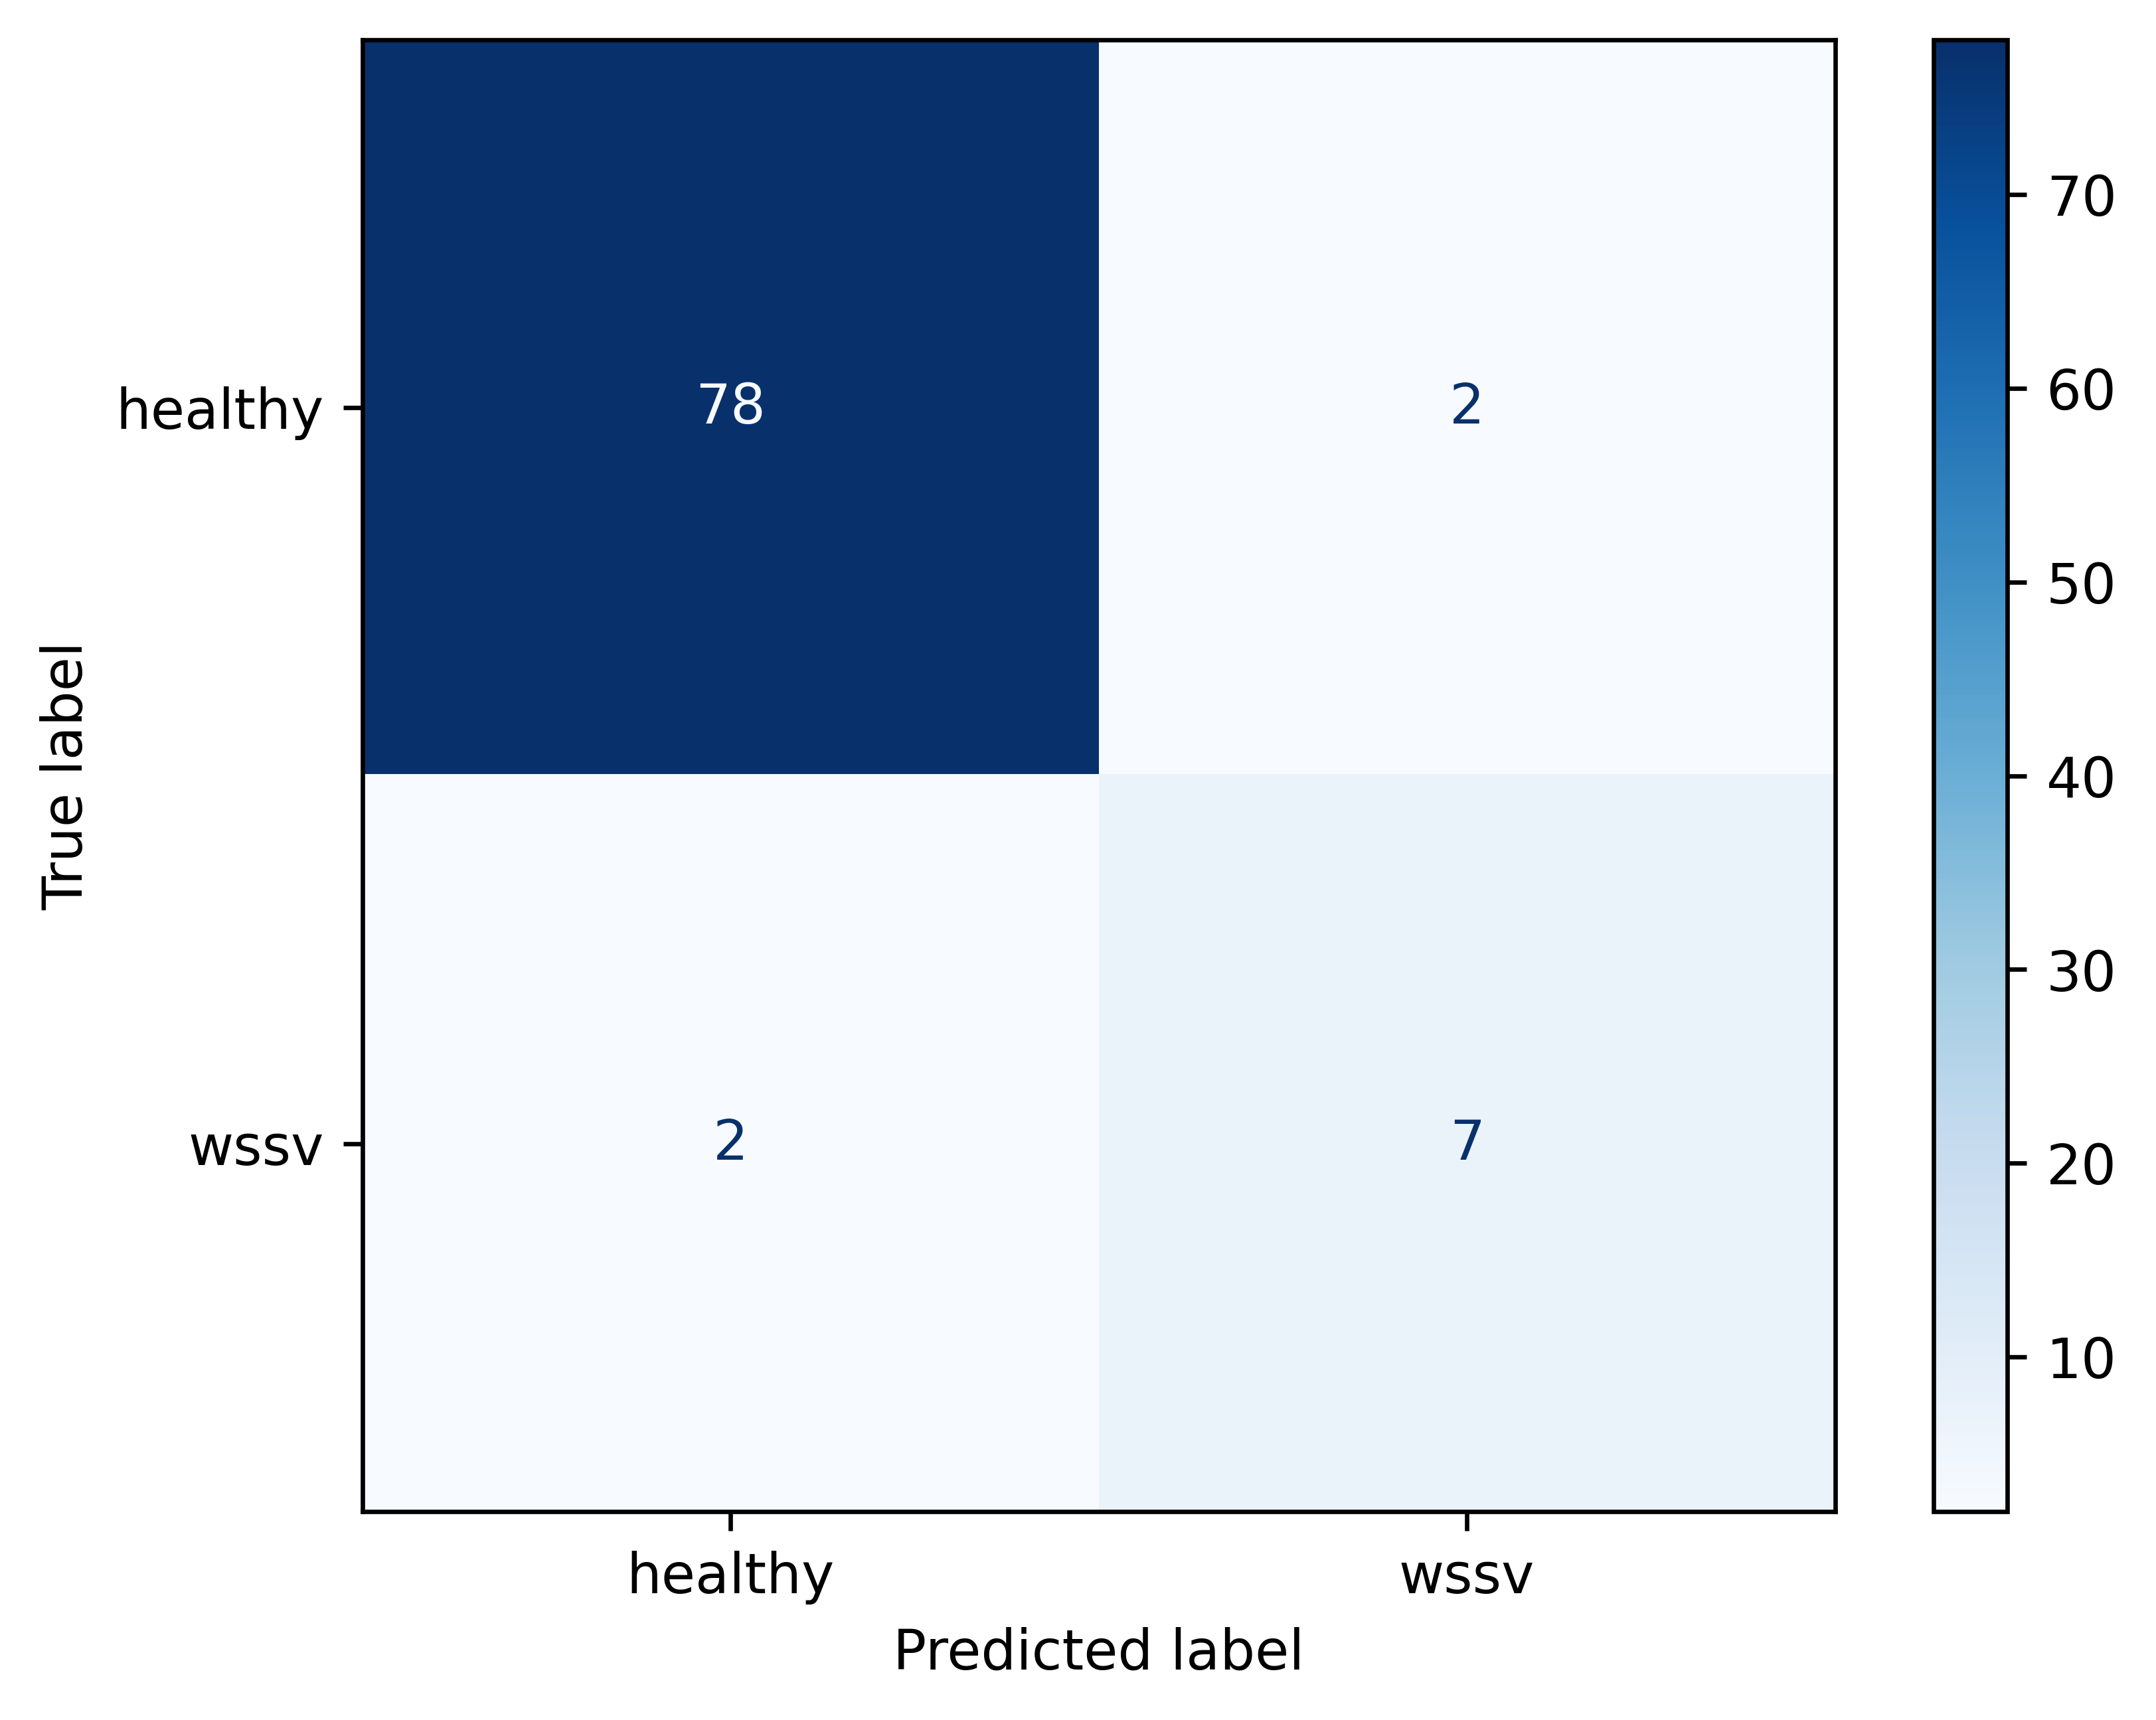

Fold 1, Training mobilenetv3small with dropout rate 0.3...
Epoch 1/50
27/27 [==============================] - 3s 55ms/step - loss: 0.8976 - precision: 0.4138 - recall: 0.4138 - f1_score: 0.5181 - false_negatives: 1006.0000 - true_positives: 710.0000 - false_positives: 1006.0000 - true_negatives: 710.0000 - val_loss: 0.8689 - val_precision: 0.4861 - val_recall: 0.4861 - val_f1_score: 0.5951 - val_false_negatives: 37.0000 - val_true_positives: 35.0000 - val_false_positives: 37.0000 - val_true_negatives: 35.0000
Epoch 2/50
27/27 [==============================] - 1s 31ms/step - loss: 0.7664 - precision: 0.5775 - recall: 0.5775 - f1_score: 0.6743 - false_negatives: 725.0000 - true_positives: 991.0000 - false_positives: 725.0000 - true_negatives: 991.0000 - val_loss: 0.6508 - val_precision: 0.5694 - val_recall: 0.5694 - val_f1_score: 0.6722 - val_false_negatives: 31.0000 - val_true_positives: 41.0000 - val_false_positives: 31.0000 - val_true_negatives: 41.0000
Epoch 3/50
27/27 [===========

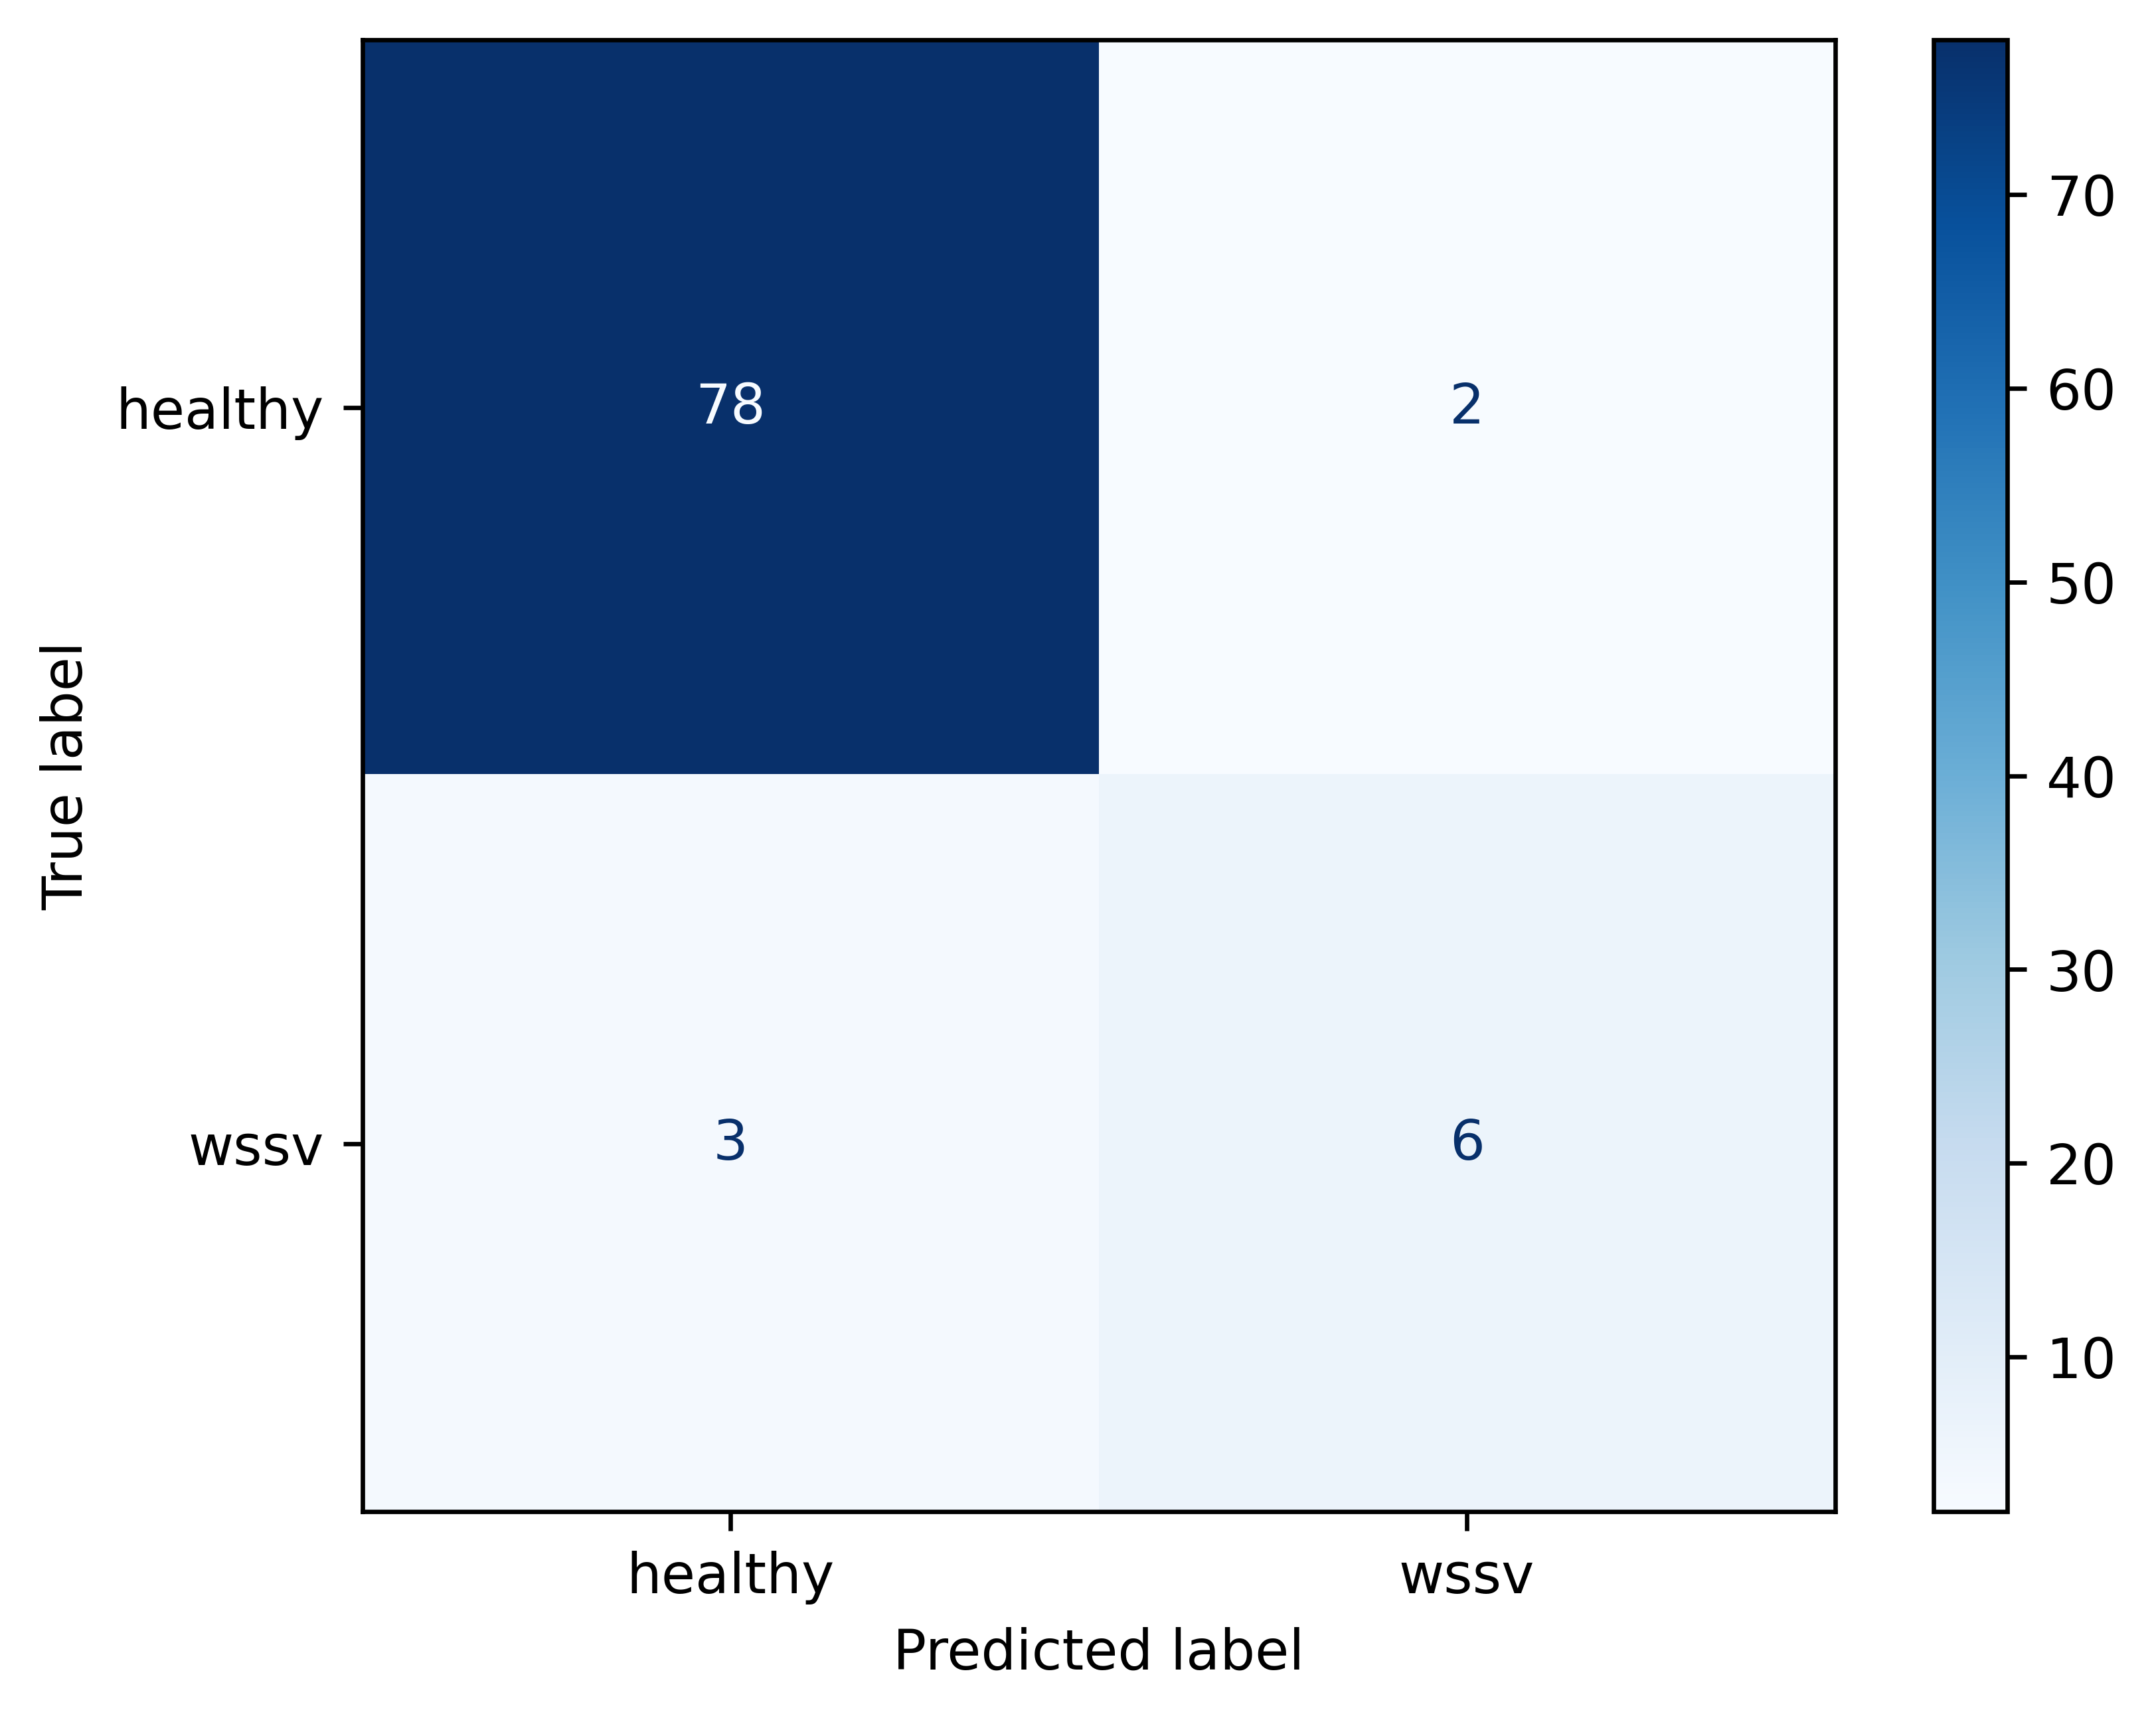

Fold 1, Training mobilenetv3small with dropout rate 0.4...
Epoch 1/50
27/27 [==============================] - 4s 82ms/step - loss: 1.1819 - precision: 0.3252 - recall: 0.3252 - f1_score: 0.4283 - false_negatives: 1158.0000 - true_positives: 558.0000 - false_positives: 1158.0000 - true_negatives: 558.0000 - val_loss: 1.0072 - val_precision: 0.4444 - val_recall: 0.4444 - val_f1_score: 0.5485 - val_false_negatives: 40.0000 - val_true_positives: 32.0000 - val_false_positives: 40.0000 - val_true_negatives: 32.0000
Epoch 2/50
27/27 [==============================] - 1s 31ms/step - loss: 1.1133 - precision: 0.4120 - recall: 0.4120 - f1_score: 0.5286 - false_negatives: 1009.0000 - true_positives: 707.0000 - false_positives: 1009.0000 - true_negatives: 707.0000 - val_loss: 0.8295 - val_precision: 0.5000 - val_recall: 0.5000 - val_f1_score: 0.6082 - val_false_negatives: 36.0000 - val_true_positives: 36.0000 - val_false_positives: 36.0000 - val_true_negatives: 36.0000
Epoch 3/50
27/27 [=========

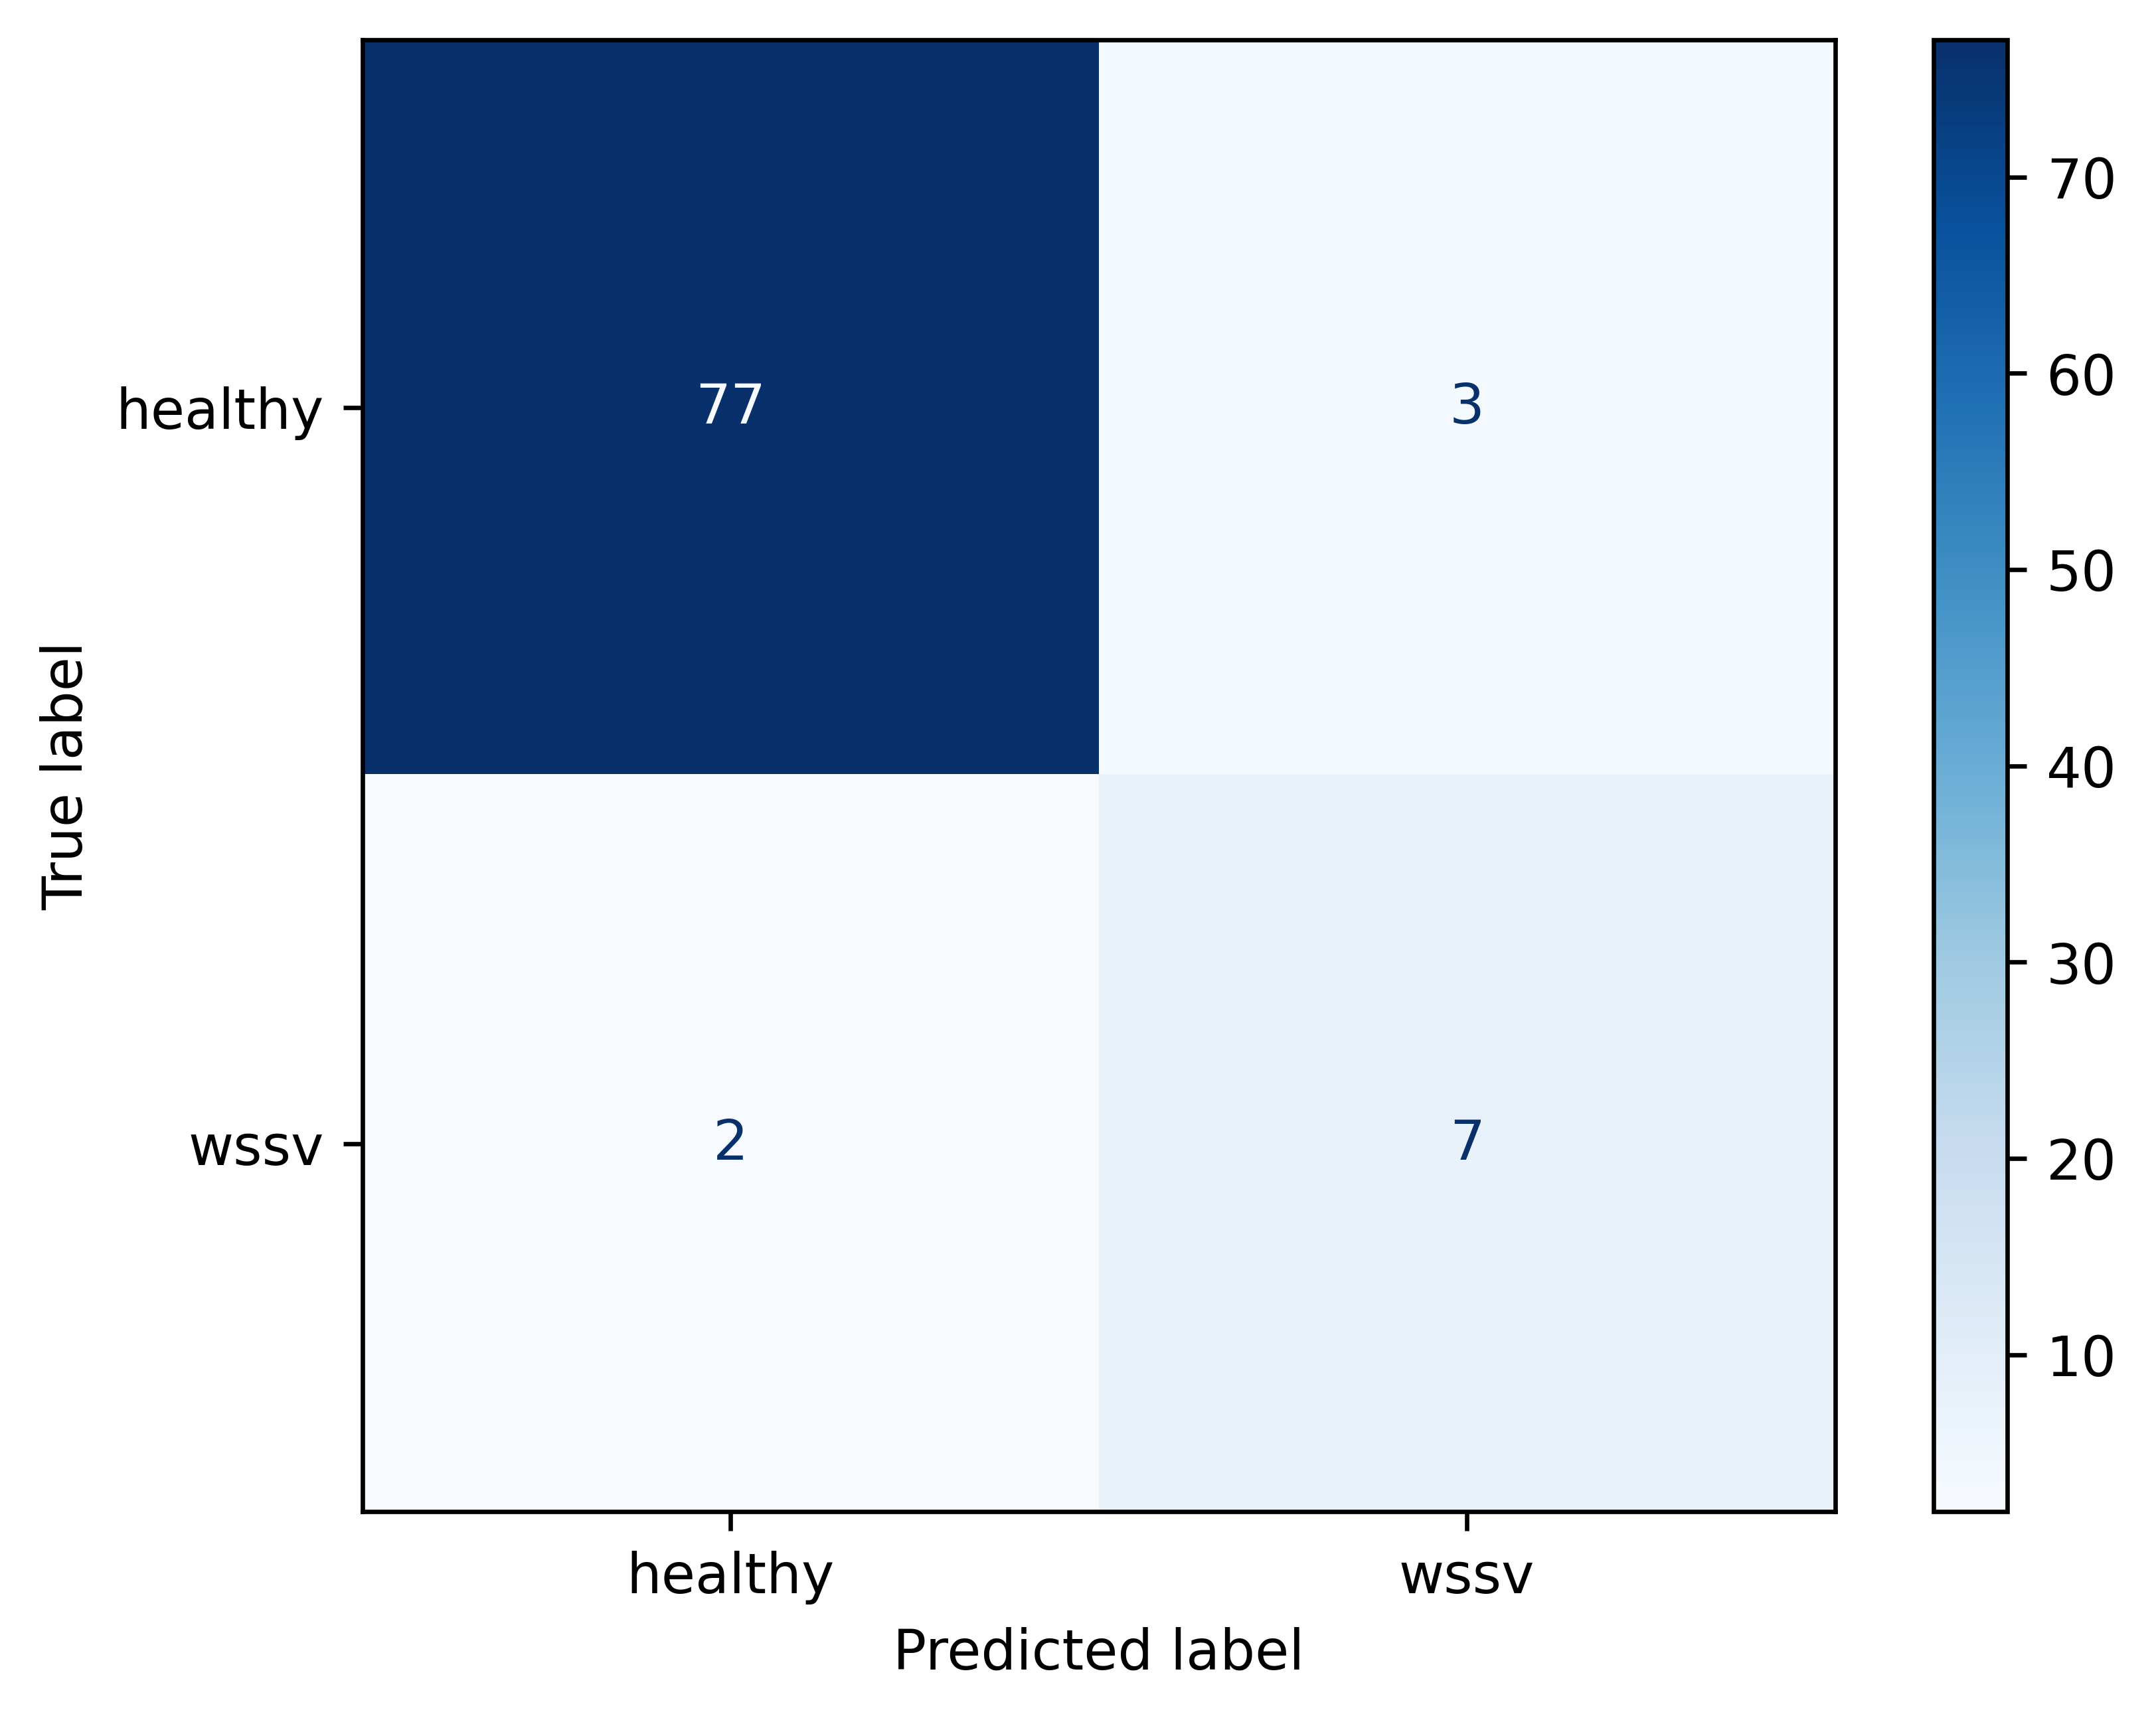

Fold 1, Training mobilenetv3small with dropout rate 0.5...
Epoch 1/50
27/27 [==============================] - 4s 57ms/step - loss: 1.0489 - precision: 0.4545 - recall: 0.4545 - f1_score: 0.5652 - false_negatives: 936.0000 - true_positives: 780.0000 - false_positives: 936.0000 - true_negatives: 780.0000 - val_loss: 0.6931 - val_precision: 0.6389 - val_recall: 0.6389 - val_f1_score: 0.7269 - val_false_negatives: 26.0000 - val_true_positives: 46.0000 - val_false_positives: 26.0000 - val_true_negatives: 46.0000
Epoch 2/50
27/27 [==============================] - 1s 31ms/step - loss: 1.0137 - precision: 0.5175 - recall: 0.5175 - f1_score: 0.6244 - false_negatives: 828.0000 - true_positives: 888.0000 - false_positives: 828.0000 - true_negatives: 888.0000 - val_loss: 0.5627 - val_precision: 0.7361 - val_recall: 0.7361 - val_f1_score: 0.7965 - val_false_negatives: 19.0000 - val_true_positives: 53.0000 - val_false_positives: 19.0000 - val_true_negatives: 53.0000
Epoch 3/50
27/27 [=============

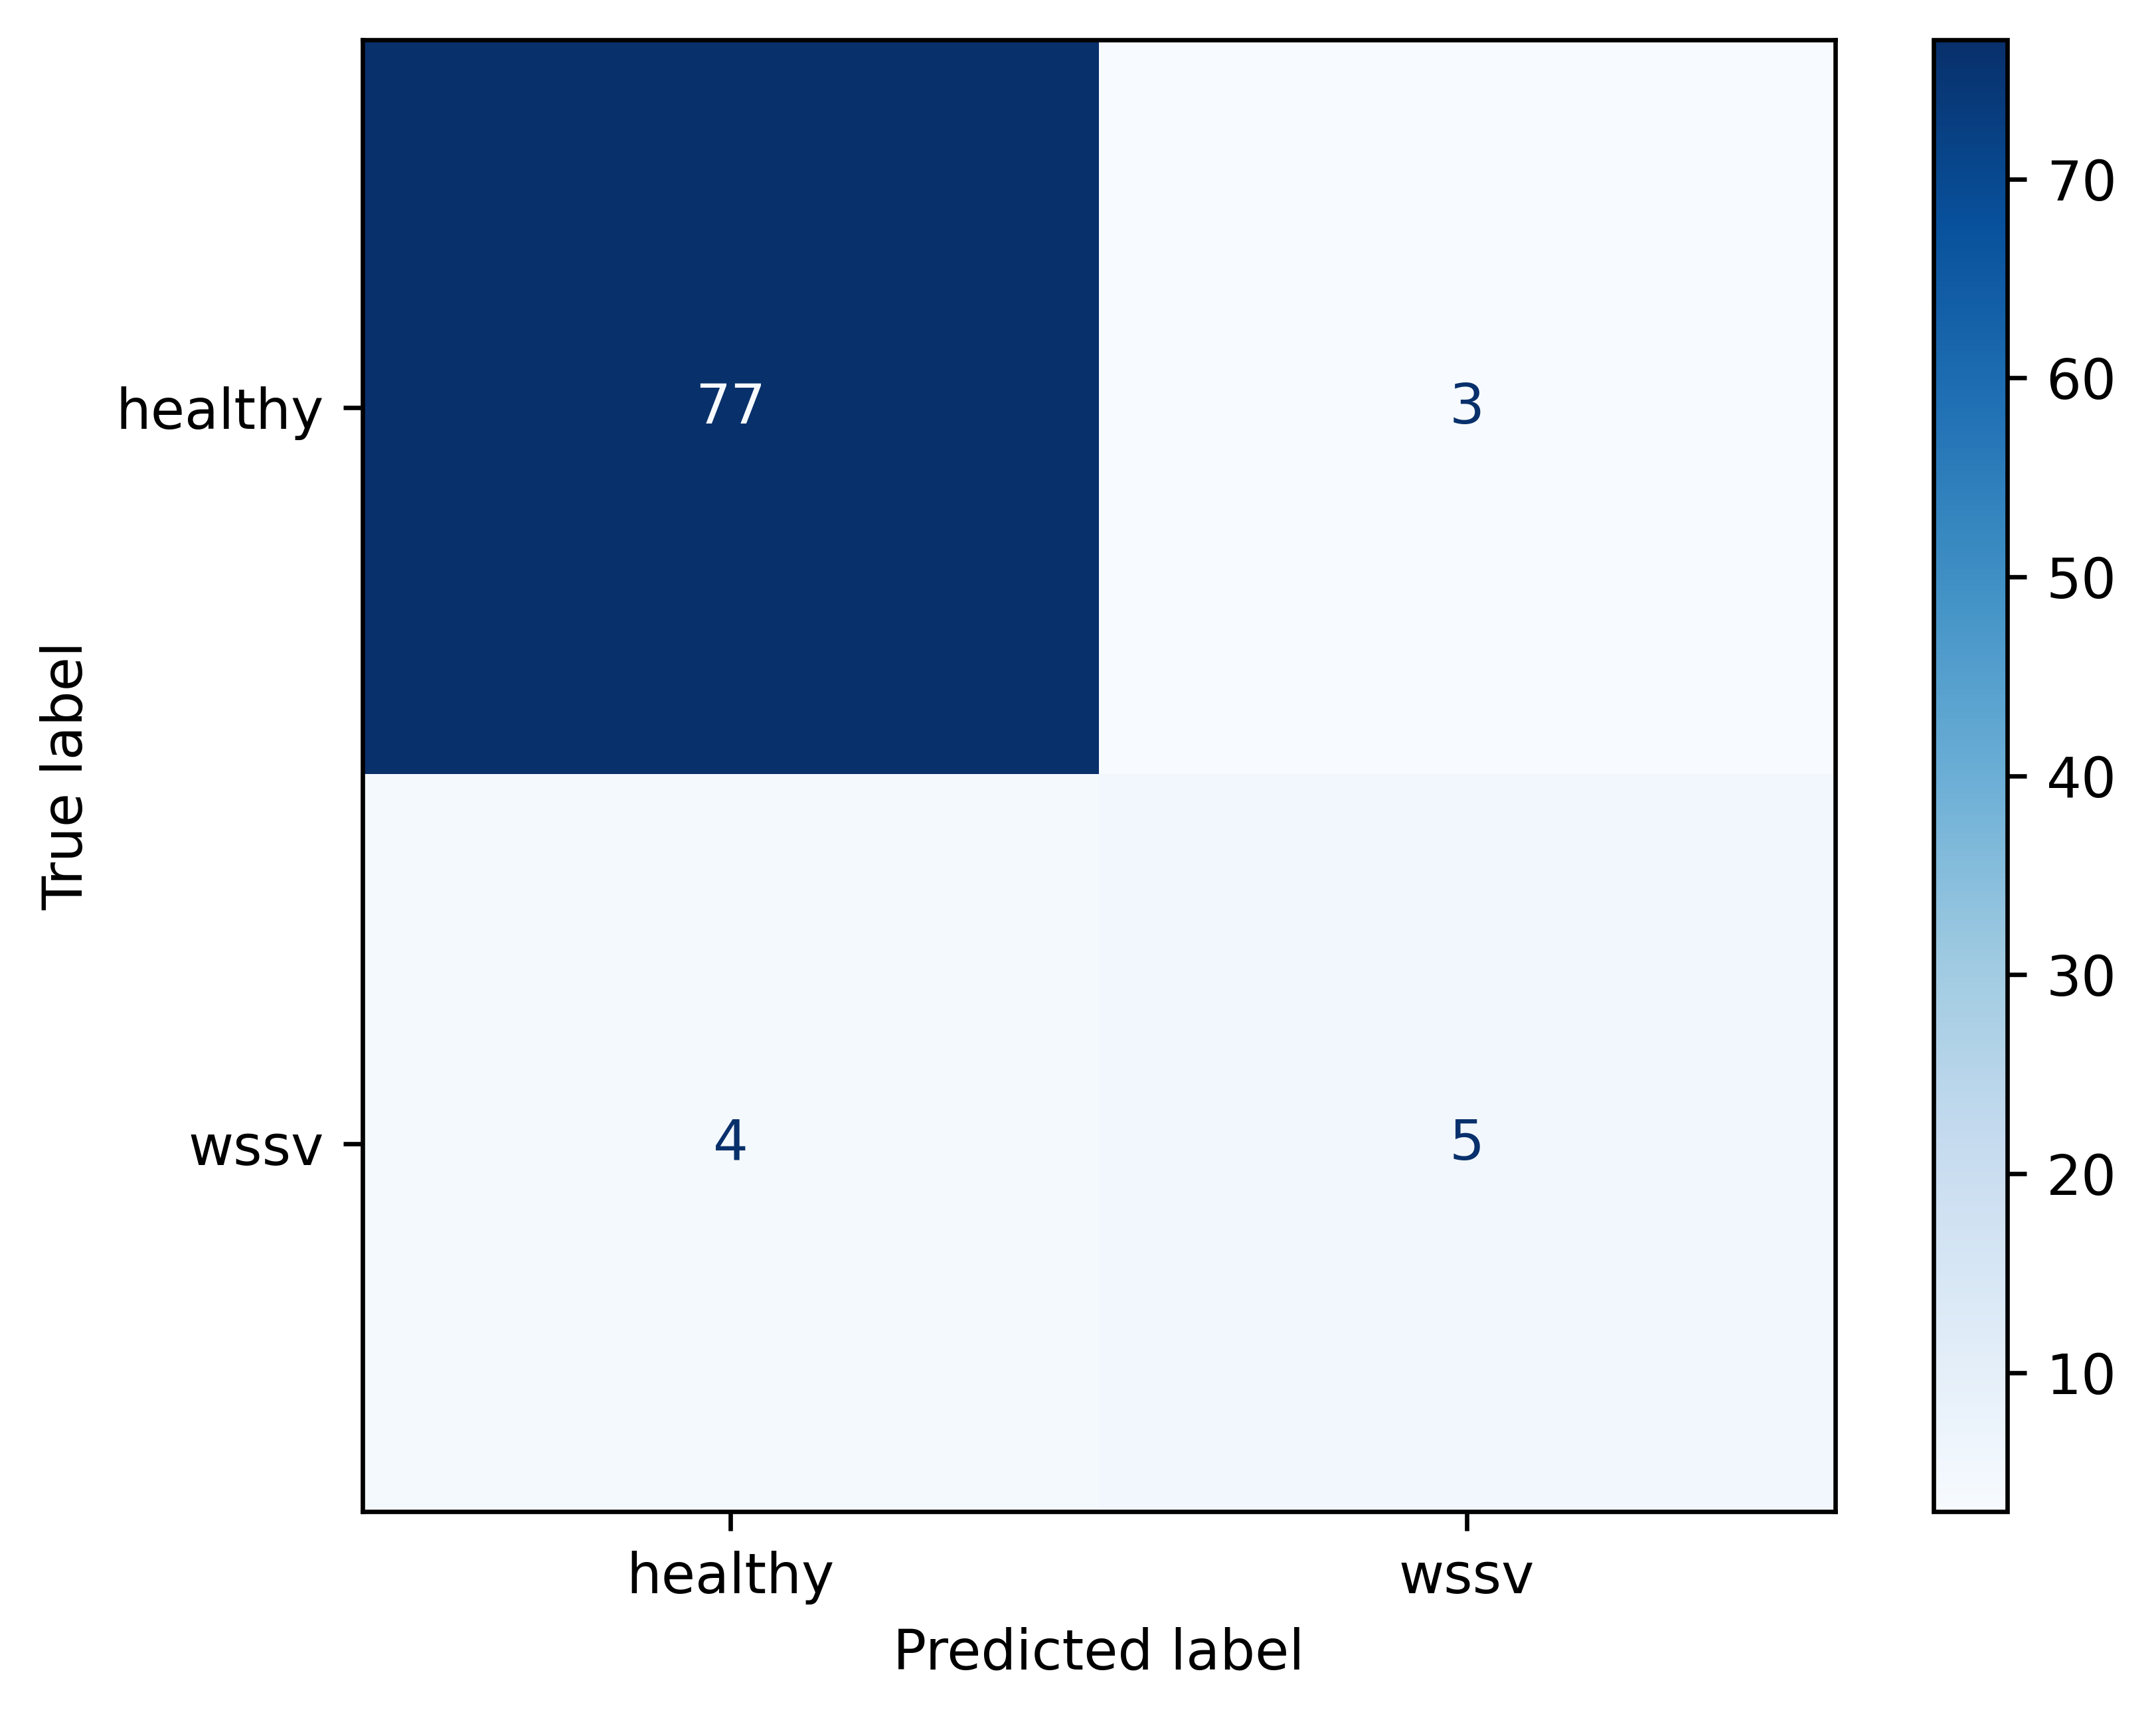

In [4]:
for rate in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]:
    # Loop over the dataset to create separate folds
    for i, (train_idx, valid_idx) in enumerate(
        cv.split(train_images, np.argmax(train_labels, axis=1))
    ):
        print(f"Fold {i + 1}, Training {model_name} with dropout rate {rate}...")

        # Create a new model instance
        model = create_model_v2(base_model, config, rate)
        X_train, y_train = train_images[train_idx], train_labels[train_idx]
        X_valid, y_valid = train_images[valid_idx], train_labels[valid_idx]

        # Augment training set
        X_train, y_train = augment_images(zip(X_train, y_train), 7)

        # Compute weights
        weights = compute_class_weight(
            class_weight="balanced",
            classes=np.unique([0, 1]),
            y=y_train.argmax(axis=1),
        )
        weights = dict(zip(np.unique([0, 1]), weights))

        # Fit the model on the train set and evaluate on the validation set
        history = model.fit(
            X_train,
            y_train,
            batch_size=config["batch_size"],
            epochs=config["epochs"],
            class_weight=weights,
            validation_data=(X_valid, y_valid),
            verbose=1,
        )

    preds = model.predict(test_images)
    preds = np.argmax(preds, axis=1).tolist()

    plt.rc("font", family="sans-serif")
    plt.rcParams["figure.dpi"] = 80

    cm = confusion_matrix(test_labels.argmax(axis=1), preds)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=["healthy", "wssv"]
    )
    disp.plot(cmap=plt.cm.Blues)
    plt.show()